# Deep Learning

### 1. Recurrent Neural Network - LSTM







Task

*   Generate a sequence of 800 values from the Mackay-Glass time series with b = 0:1, c = 0:2 and tau = 17.
Initialize the first 18 values of y as follows:
y = [0.9697 0.9699 0.9794 1.0003 1.0319 1.0703 1.1076 1.1352 1.1485 1.1482 1.1383 1.1234 1.1072 1.0928 1.0820 1.0756 1.0739 1.0759]; Plot y to make sure the values have been computed correctly.
*   Remove the first 100 values of y to reduce the bias towards the initial values. Split the remaining 700
values into 300 values for training and 400 for testing. Train a recurrent neural network on the training
values. Test the performance of the network on the testing values and plot the predicted values next

*   Experiment with different delays and different number of hidden nodes and try to increase the prediction
accuracy.



---



1.1 Generate a sequence of 800 values from the Mackay-Glass time series

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,Dropout,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy.fft as fft

In [ ]:
# Given the values of y
y0 = np.array([0.9697,0.9699,0.9794,1.0003,1.0319,1.0703,1.1076,1.1352,1.1485,1.1482,1.1383,1.1234,1.1072,1.0928,1.0820,1.0756,1.0739,1.0759])

In [ ]:
# Definition of the time series generating function
def mackayGlass(b,c,tau,y0,n):
  #
  Yend = np.zeros((n))
  dimYini = len(y0)
  if (dimYini > tau) :
    # The difference equation can be performed
    Yend[0:dimYini] = y0 # Assign the current initial values to the serie
    for i in range(dimYini,n):
      Yn = Yend[i-1]
      aux1 = Yn - b * Yn
      Yntau = Yend[i-tau-1]
      aux2 = c * Yntau / (1 + np.power(Yntau,10))
      Ynext = aux1 + aux2
      Yend[i]=Ynext
  return Yend

In [ ]:
# Generate a sequence of m equal to 800 given the following parameters
b=0.1
c=0.2
tau=17
nSampl=50
yres = mackayGlass(b,c,tau,y0,nSampl)
print(yres)

nSampl=800
yres = mackayGlass(b,c,tau,y0,nSampl)

[0.9697     0.9699     0.9794     1.0003     1.0319     1.0703
 1.1076     1.1352     1.1485     1.1482     1.1383     1.1234
 1.1072     1.0928     1.082      1.0756     1.0739     1.0759
 1.08008154 1.08377027 1.08348978 1.07502078 1.05463879 1.02118416
 0.97769029 0.92977576 0.88280169 0.84060916 0.8054831  0.77841181
 0.75932979 0.74713766 0.74006496 0.73607165 0.7331149  0.72970445
 0.72508158 0.71956612 0.7147047  0.71346421 0.72017254 0.73960924
 0.77440028 0.82236696 0.87726495 0.93247808 0.98371613 1.0292715
 1.06911252 1.10394611]


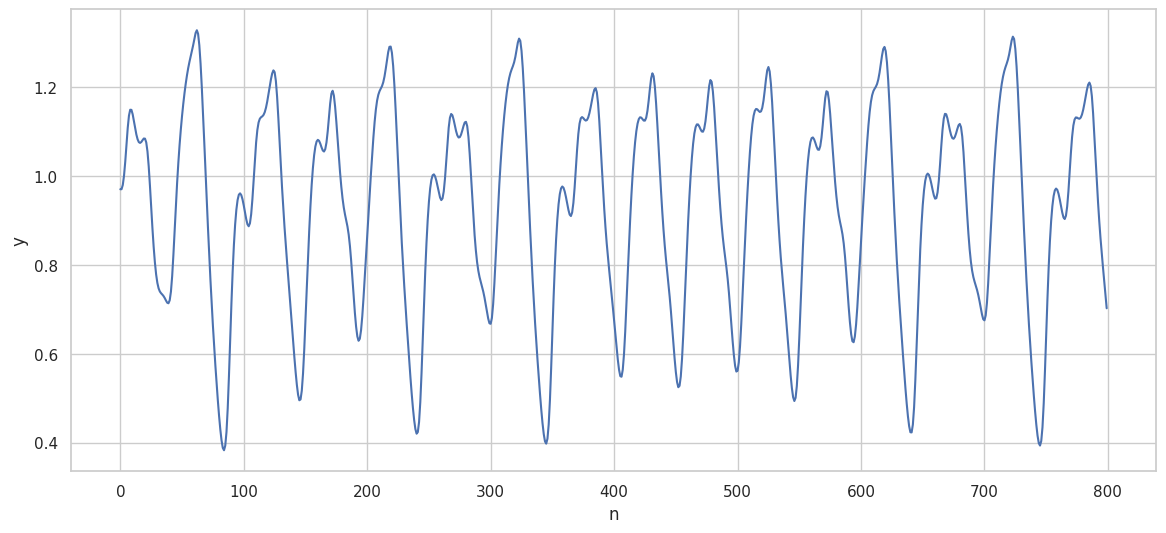

In [ ]:
pddf1 = pd.DataFrame({'n': range(nSampl),
                      'y': yres })
# Build a graph plotting the Time Series
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("whitegrid")
sns.lineplot(data=pddf1, x="n", y="y")
plt.show()

   1.2. Remove the frst 100 values of *y* to reduce the bias towards the initial values. Split the remaining 700
values into 300 values for training and 400 for testing. Train a recurrent neural network on the training
values. Test the performance of the network on the testing values and plot the predicted values next
to the real values.


In [ ]:
ytrain = yres[100:400]
ytest = yres[400:800]
print(ytrain.shape,ytest.shape)

(300,) (400,)


In [ ]:
# Normalization of the dataset
yres1 = yres[:, np.newaxis]

dataset = yres1
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train, test = dataset[100:400,:], dataset[400:800,:]

print(len(train), len(test))

300 400


In [ ]:
# Convert array of values in a matrix form
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)


> After having defined the function, it will be used to prepare the training and testing sets prior to modeling




In [ ]:
# Preparation of the datasets
# To ensure same results we fix random seed
tf.random.set_seed(13)

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Create a type of recurrent neural network known as LSTM and fit the network
print(trainX[1:5])
print(trainY[1:5])

[[[0.56609803]]

 [[0.55006444]]

 [[0.5378093 ]]

 [[0.53327143]]]
[0.55006444 0.5378093  0.53327143 0.5404564 ]


In [ ]:
# The LSTM network expects the input data to be provided with an array of this form [samples,timestep,features]
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error","mae"])
model1.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
298/298 - 5s - loss: 0.1664 - mean_squared_error: 0.1664 - mae: 0.3450 - 5s/epoch - 16ms/step
Epoch 2/100
298/298 - 1s - loss: 0.0311 - mean_squared_error: 0.0311 - mae: 0.1472 - 817ms/epoch - 3ms/step
Epoch 3/100
298/298 - 1s - loss: 0.0213 - mean_squared_error: 0.0213 - mae: 0.1191 - 811ms/epoch - 3ms/step
Epoch 4/100
298/298 - 1s - loss: 0.0147 - mean_squared_error: 0.0147 - mae: 0.0981 - 837ms/epoch - 3ms/step
Epoch 5/100
298/298 - 1s - loss: 0.0093 - mean_squared_error: 0.0093 - mae: 0.0788 - 865ms/epoch - 3ms/step
Epoch 6/100
298/298 - 1s - loss: 0.0053 - mean_squared_error: 0.0053 - mae: 0.0596 - 949ms/epoch - 3ms/step
Epoch 7/100
298/298 - 1s - loss: 0.0029 - mean_squared_error: 0.0029 - mae: 0.0454 - 855ms/epoch - 3ms/step
Epoch 8/100
298/298 - 1s - loss: 0.0018 - mean_squared_error: 0.0018 - mae: 0.0370 - 1s/epoch - 5ms/step
Epoch 9/100
298/298 - 1s - loss: 0.0015 - mean_squared_error: 0.0015 - mae: 0.0327 - 1s/epoch - 4ms/step
Epoch 10/100
298/298 - 1s - loss: 0.

In [ ]:
# Model predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
#%%
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#%%

13/13 [==============================] - 0s 2ms/step


In [ ]:
# Compute the MSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %f RMSE' % (testScore))

Train Score: 0.034132 RMSE
Test Score: 0.035165 RMSE


  
Plot the Real time Series vs Model Predicted




305


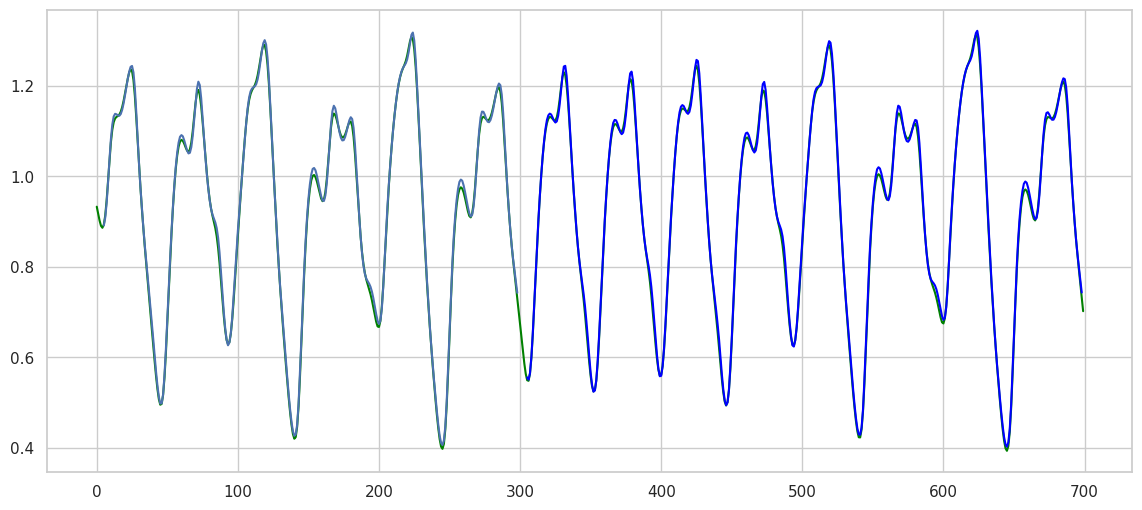

In [ ]:
# Shifting the training predictions
trainPredictPlot = np.empty_like(dataset[100:800,:])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

print(len(trainPredict)+(look_back*2)+1)

# Shifting testing predictions
testPredictPlot = np.empty_like(dataset[100:800,:])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:700-1, :] = testPredict

# Plot
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("whitegrid")
plt.plot(scaler.inverse_transform(dataset[100:800]),color="green")
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="blue")
plt.show()

   1.3 Experiment with different delays and different number of hidden nodes and try to increase the prediction. In the following code cells, different models have been tested. LSTM introduces 25 units and by adding a Dropout layer is possible to overcome the overfitting problem.

In [ ]:
# Create and fit LSTM network
model2 = Sequential()
model2.add(LSTM(units=25, input_shape=(1, look_back)))
model2.add(Dropout(0.1))
model2.add(Dense(1))


In [ ]:
# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model2.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error","mae"])
model2.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
298/298 - 3s - loss: 0.1108 - mean_squared_error: 0.1108 - mae: 0.2558 - 3s/epoch - 10ms/step
Epoch 2/100
298/298 - 1s - loss: 0.0177 - mean_squared_error: 0.0177 - mae: 0.1060 - 514ms/epoch - 2ms/step
Epoch 3/100
298/298 - 1s - loss: 0.0114 - mean_squared_error: 0.0114 - mae: 0.0838 - 507ms/epoch - 2ms/step
Epoch 4/100
298/298 - 1s - loss: 0.0058 - mean_squared_error: 0.0058 - mae: 0.0599 - 509ms/epoch - 2ms/step
Epoch 5/100
298/298 - 1s - loss: 0.0045 - mean_squared_error: 0.0045 - mae: 0.0526 - 505ms/epoch - 2ms/step
Epoch 6/100
298/298 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - mae: 0.0493 - 500ms/epoch - 2ms/step
Epoch 7/100
298/298 - 1s - loss: 0.0039 - mean_squared_error: 0.0039 - mae: 0.0499 - 545ms/epoch - 2ms/step
Epoch 8/100
298/298 - 1s - loss: 0.0032 - mean_squared_error: 0.0032 - mae: 0.0460 - 500ms/epoch - 2ms/step
Epoch 9/100
298/298 - 1s - loss: 0.0040 - mean_squared_error: 0.0040 - mae: 0.0504 - 504ms/epoch - 2ms/step
Epoch 10/100
298/298 - 0s - lo

In [ ]:
# Make predictions of model two
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

13/13 [==============================] - 0s 2ms/step


In [ ]:
# Compute the MSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %f RMSE' % (testScore))

Train Score: 0.035059 RMSE
Test Score: 0.036197 RMSE


In [ ]:
# Model three with a different number of units and delayes
# Range [1,5]
# Reshape into X=t and Y=t+1

look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Defining the architecture
# Create and fit the LSTM network

model3 = Sequential()
model3.add(LSTM(100,activation='relu',input_shape=(1, look_back)))
model3.add(Dense(1))

In [ ]:
# Compiling the model
model3.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error","mae"])
model3.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
294/294 - 5s - loss: 0.0478 - mean_squared_error: 0.0478 - mae: 0.1492 - 5s/epoch - 16ms/step
Epoch 2/100
294/294 - 1s - loss: 0.0059 - mean_squared_error: 0.0059 - mae: 0.0654 - 758ms/epoch - 3ms/step
Epoch 3/100
294/294 - 1s - loss: 0.0025 - mean_squared_error: 0.0025 - mae: 0.0417 - 561ms/epoch - 2ms/step
Epoch 4/100
294/294 - 1s - loss: 0.0012 - mean_squared_error: 0.0012 - mae: 0.0264 - 515ms/epoch - 2ms/step
Epoch 5/100
294/294 - 1s - loss: 9.1433e-04 - mean_squared_error: 9.1433e-04 - mae: 0.0243 - 512ms/epoch - 2ms/step
Epoch 6/100
294/294 - 1s - loss: 9.3650e-04 - mean_squared_error: 9.3650e-04 - mae: 0.0247 - 521ms/epoch - 2ms/step
Epoch 7/100
294/294 - 1s - loss: 8.9636e-04 - mean_squared_error: 8.9636e-04 - mae: 0.0240 - 521ms/epoch - 2ms/step
Epoch 8/100
294/294 - 1s - loss: 8.5078e-04 - mean_squared_error: 8.5078e-04 - mae: 0.0231 - 516ms/epoch - 2ms/step
Epoch 9/100
294/294 - 0s - loss: 8.2812e-04 - mean_squared_error: 8.2812e-04 - mae: 0.0236 - 495ms/epoch -

In [ ]:
# Make predictions
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

13/13 [==============================] - 0s 2ms/step


In [ ]:
# Compute the MSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %f RMSE' % (testScore))

Train Score: 0.008783 RMSE
Test Score: 0.008923 RMSE


> Considering the following:
*   The **RMSE** goes from **0.03507** in **Model 1** to **0.00869** in **Model 3**

> The capability of the network will be improved given the additional information. It will be represented as a graphical output



305


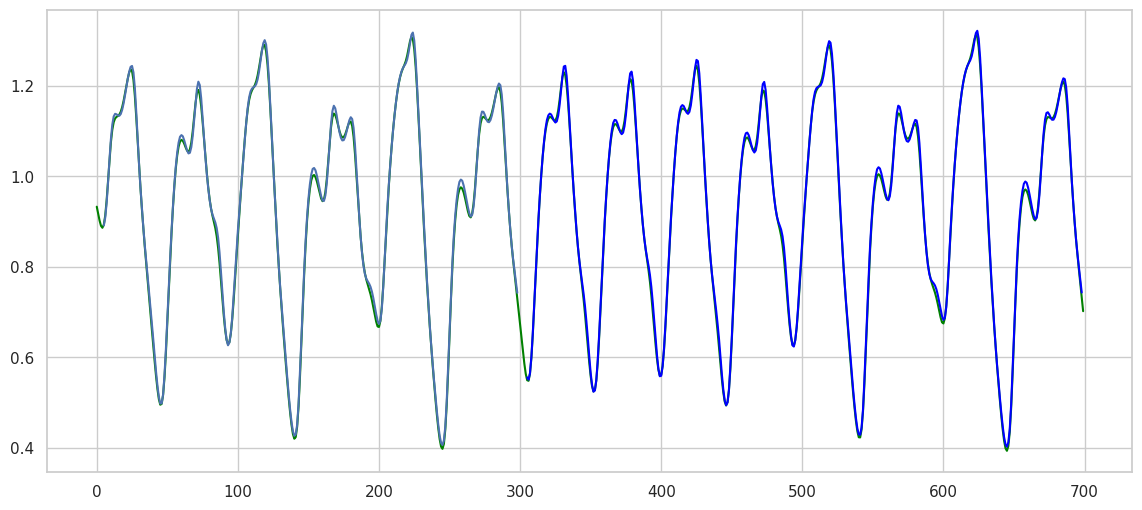

In [ ]:
# Shifting training predictions
trainPredictPlot = np.empty_like(dataset[100:800,:])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

print(len(trainPredict)+(look_back*2)+1)

# Shifting testing predictions
testPredictPlot = np.empty_like(dataset[100:800,:])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:700-1, :] = testPredict

# Plot
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("whitegrid")
plt.plot(scaler.inverse_transform(dataset[100:800]),color="green")
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot,color="blue")
plt.show()